In [120]:
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.layers import Dropout

In [2]:
data = pd.read_csv("C:/Users/tomas/Documents/UdeSA/Cuarto Año/Segundo Cuatri (ultimo)/Ciencia de Datos/tp1_data/Credit_Score_cleaned_data.csv")

data.head()

,Customer_ID,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Last_Loan_9,Last_Loan_8,Last_Loan_7,Last_Loan_6,Last_Loan_5,Last_Loan_4,Last_Loan_3,Last_Loan_2,Last_Loan_1,Credit_Score
0,CUS_0x98ed,31,Journalist,22229.060,1672.421667,6,4,5.0,3,10,...,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,Debt Consolidation Loan,Home Equity Loan,Debt Consolidation Loan,Standard
1,CUS_0x36b4,43,Musician,17060.705,1685.725417,8,3,11.0,4,24,...,No Loan,No Loan,No Loan,No Loan,No Loan,Debt Consolidation Loan,Home Equity Loan,Auto Loan,Auto Loan,Standard
2,CUS_0x105b,24,Accountant,34428.210,2575.017500,2,4,8.0,0,3,...,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,Good
3,CUS_0x4c4a,21,Accountant,12613.920,1155.160000,4,6,13.0,3,14,...,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,Personal Loan,Student Loan,Home Equity Loan,Standard
4,CUS_0x612f,31,Journalist,34775.160,3048.930000,7,9,25.0,5,20,...,No Loan,No Loan,No Loan,No Loan,Auto Loan,Mortgage Loan,Auto Loan,Payday Loan,Not Specified,Poor


In [7]:
print(data.shape)

(100000, 32)


In [3]:
data.drop('Customer_ID', axis=1, inplace=True)

In [11]:
columns = data.columns.tolist()
print(columns)

['Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance', 'Last_Loan_9', 'Last_Loan_8', 'Last_Loan_7', 'Last_Loan_6', 'Last_Loan_5', 'Last_Loan_4', 'Last_Loan_3', 'Last_Loan_2', 'Last_Loan_1', 'Credit_Score']


In [129]:
# Check the percentage of missing data for each column
missing_percentage = (data.isnull().sum() / len(data)) * 100
print(missing_percentage)

Age                          0.000
Annual_Income                0.000
Monthly_Inhand_Salary        0.000
Num_Bank_Accounts            0.000
Num_Credit_Card              0.000
Interest_Rate                0.000
Num_of_Loan                  0.000
Delay_from_due_date          0.000
Num_of_Delayed_Payment       0.000
Changed_Credit_Limit         0.000
Num_Credit_Inquiries         0.000
Credit_Mix                  23.768
Outstanding_Debt             0.000
Credit_Utilization_Ratio     0.000
Credit_History_Age           0.000
Payment_of_Min_Amount        0.000
Total_EMI_per_month          0.000
Amount_invested_monthly      0.000
Payment_Behaviour            0.000
Monthly_Balance              0.000
Last_Loan_9                  0.000
Last_Loan_8                  0.000
Last_Loan_7                  0.000
Last_Loan_6                  0.000
Last_Loan_5                  0.000
Last_Loan_4                  0.000
Last_Loan_3                  0.000
Last_Loan_2                  0.000
Last_Loan_1         

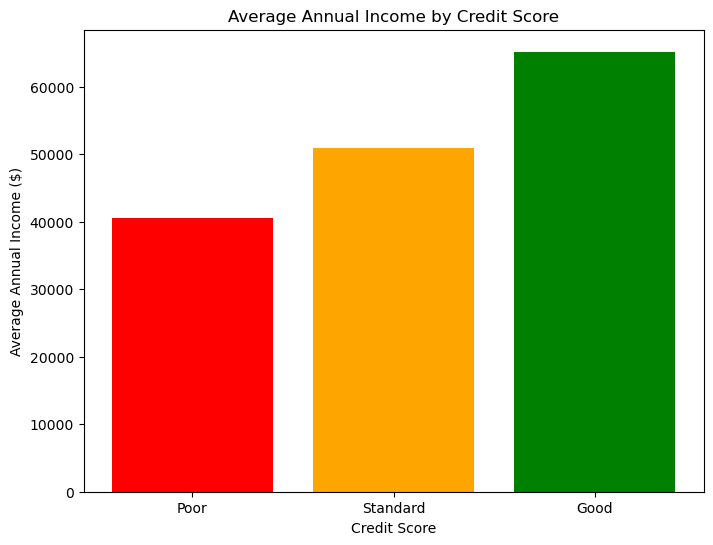

In [13]:
## Ingreso Anual ##

data['Credit_Score'] = pd.Categorical(data['Credit_Score'], categories=['Poor', 'Standard', 'Good'], ordered=True)

# Group by 'Credit_Score' and calculate the mean of 'Annual_Income'
mean_income = data.groupby('Credit_Score', observed = True)['Annual_Income'].mean()

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(mean_income.index, mean_income.values, color=['red', 'orange', 'green'])

# Labeling
plt.xlabel('Credit Score')
plt.ylabel('Average Annual Income ($)')
plt.title('Average Annual Income by Credit Score')
plt.show()

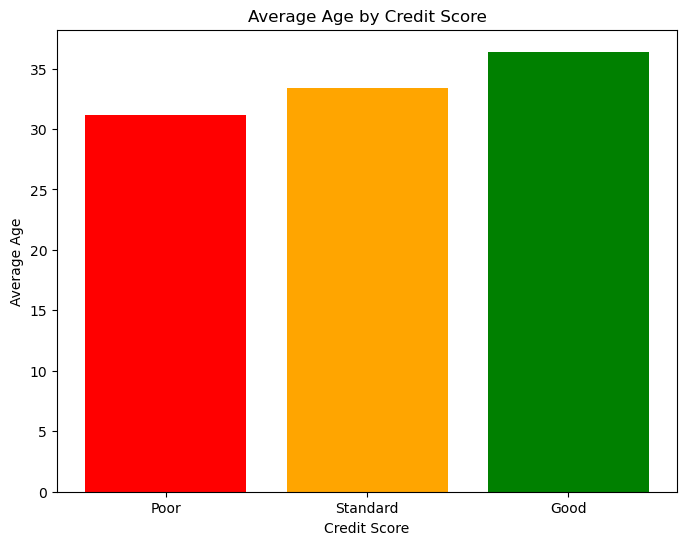

In [15]:
## Edad por Credit Score ##

data['Credit_Score'] = pd.Categorical(data['Credit_Score'], categories=['Poor', 'Standard', 'Good'], ordered=True)

# Group by 'Credit_Score' and calculate the mean of 'Annual_Income'
mean_income = data.groupby('Credit_Score', observed = True)['Age'].mean()

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(mean_income.index, mean_income.values, color=['red', 'orange', 'green'])

# Labeling
plt.xlabel('Credit Score')
plt.ylabel('Average Age')
plt.title('Average Age by Credit Score')
plt.show()

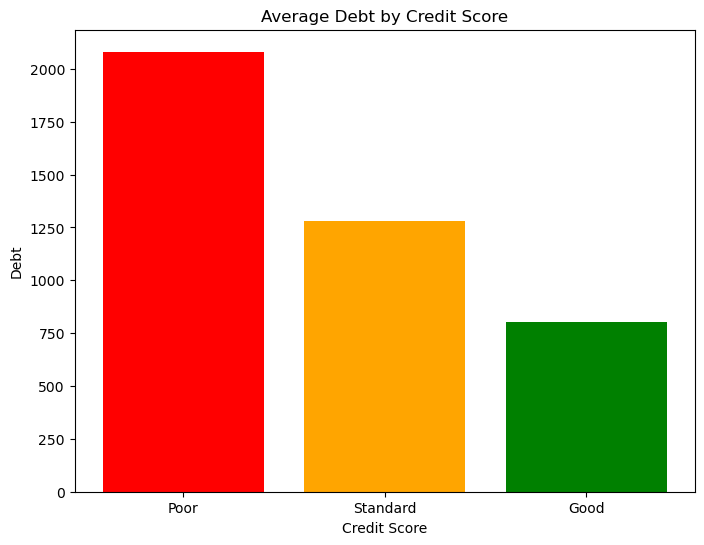

In [17]:
## Deuda por Credit Score ##

data['Credit_Score'] = pd.Categorical(data['Credit_Score'], categories=['Poor', 'Standard', 'Good'], ordered=True)

# Group by 'Credit_Score' and calculate the mean of 'Annual_Income'
mean_income = data.groupby('Credit_Score', observed = True)['Outstanding_Debt'].mean()

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(mean_income.index, mean_income.values, color=['red', 'orange', 'green'])

# Labeling
plt.xlabel('Credit Score')
plt.ylabel('Debt')
plt.title('Average Debt by Credit Score')
plt.show()

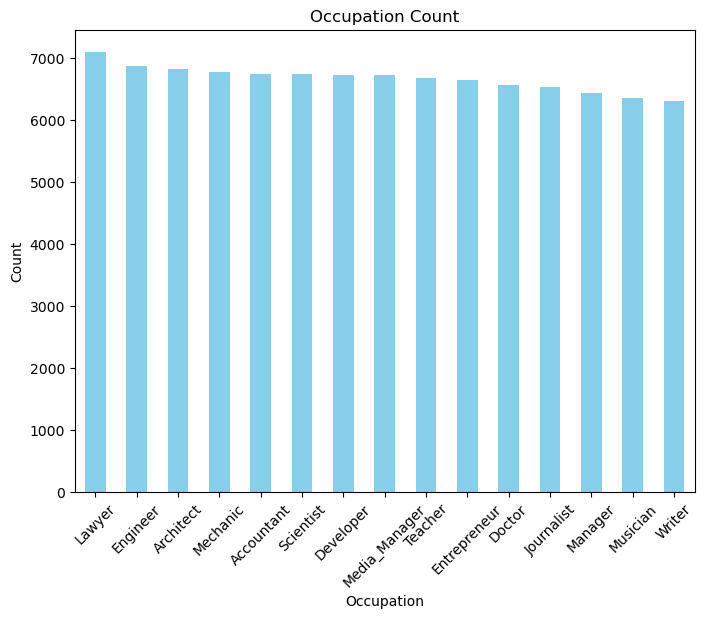

In [19]:
occupation_counts = data['Occupation'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
occupation_counts.plot(kind='bar', color='skyblue')

# Labeling
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Occupation Count')
plt.xticks(rotation=45)
plt.show()

C:\Users\tomas\AppData\Local\Temp\ipykernel_7488\3956310129.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_df = data.groupby(['Occupation', 'Credit_Score']).size().reset_index(name='count')


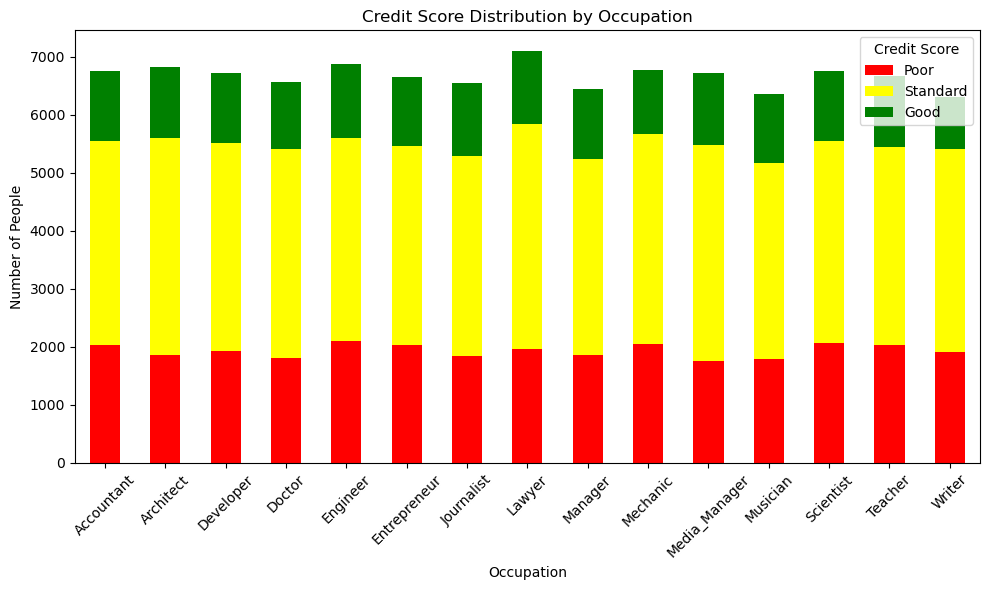

In [21]:
## Deuda por Credit Score ##

# Group by occupation and credit score, then count the occurrences
count_df = data.groupby(['Occupation', 'Credit_Score']).size().reset_index(name='count')

# Pivot the table to have occupations as rows and credit scores as columns
pivot_df = count_df.pivot(index='Occupation', columns='Credit_Score', values='count').fillna(0)

# Ensure the columns are in the correct order: 'Poor', 'Standard', 'Good'
pivot_df = pivot_df[['Poor', 'Standard', 'Good']]

# Plotting
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6), color=['red', 'yellow', 'green'])

# Set title and labels
ax.set_title('Credit Score Distribution by Occupation')
ax.set_xlabel('Occupation')
ax.set_ylabel('Number of People')
ax.set_xticklabels(pivot_df.index, rotation=45)
ax.legend(title='Credit Score', loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

In [7]:
data['Credit_Score'] = data['Credit_Score'].map({'Poor': 0, 'Standard': 1, 'Good': 2})

In [9]:
data = pd.get_dummies(data, columns=['Occupation'], drop_first=False)


In [11]:
data['Credit_Mix'] = data['Credit_Mix'].map({'Poor': 0, 'Standard': 1, 'Good': 2})

In [13]:
data['Payment_of_Min_Amount'] = np.where(data['Payment_of_Min_Amount'] == 'Yes', 1, 0)

In [15]:
cont_vars = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
             'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
             'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 
             'Outstanding_Debt', 'Credit_Utilization_Ratio', 
             'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
             'Monthly_Balance']


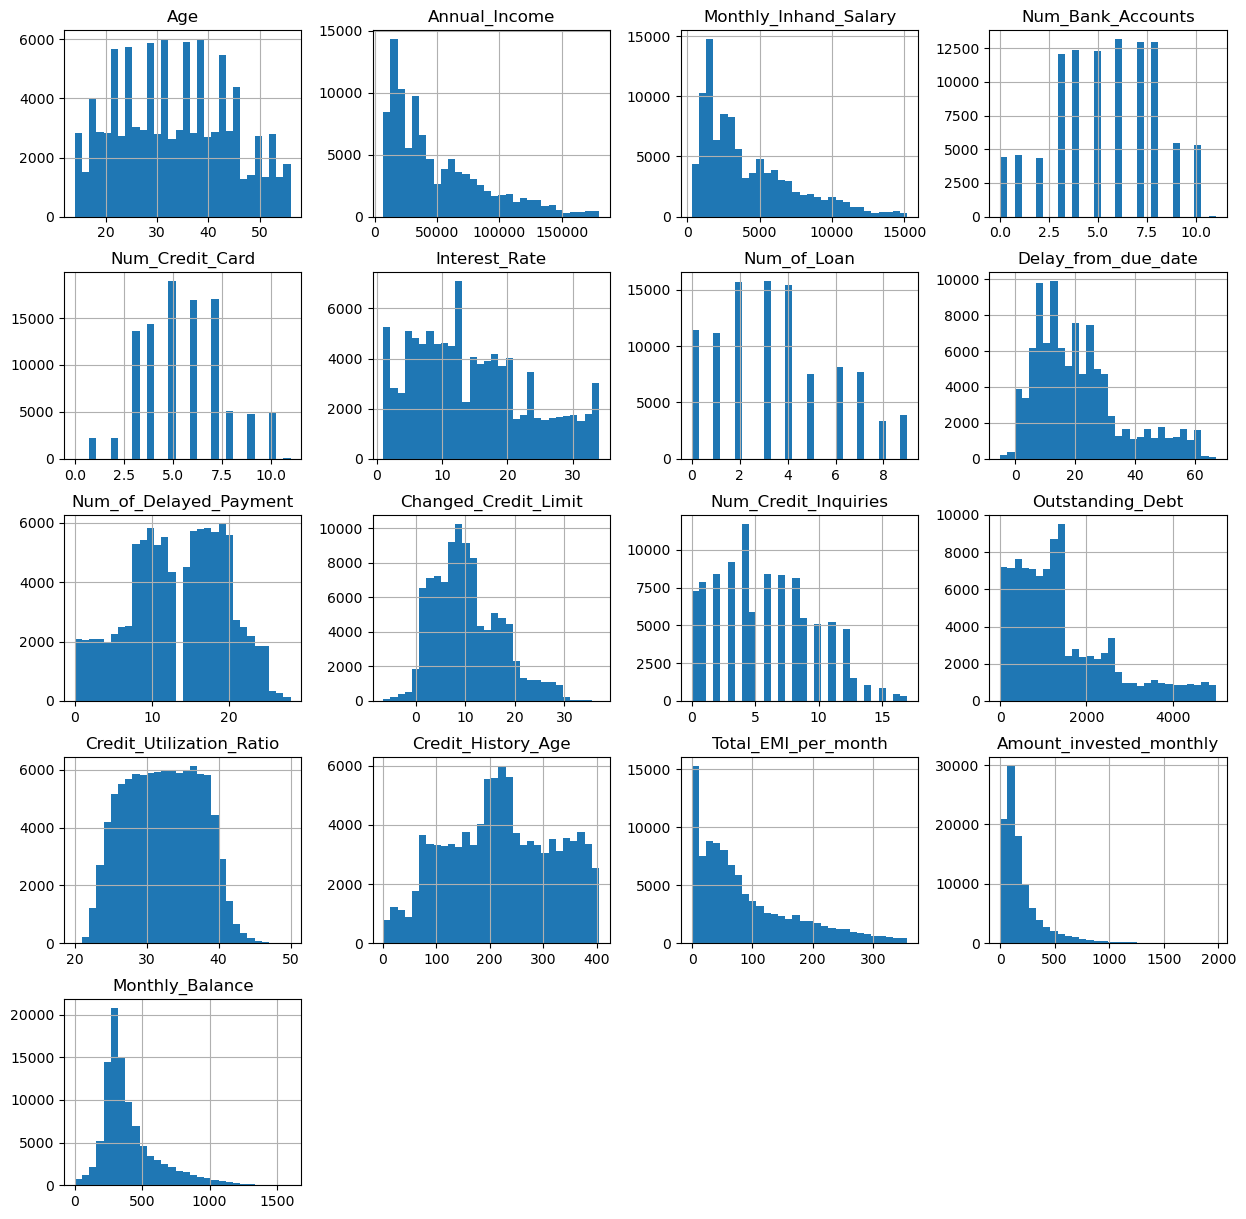

In [37]:
data[cont_vars].hist(bins=30, figsize=(15,15))
plt.show()

In [186]:
columns = data.columns.tolist()
print(columns)

['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance', 'Last_Loan_9', 'Last_Loan_8', 'Last_Loan_7', 'Last_Loan_6', 'Last_Loan_5', 'Last_Loan_4', 'Last_Loan_3', 'Last_Loan_2', 'Last_Loan_1', 'Credit_Score', 'Occupation_Accountant', 'Occupation_Architect', 'Occupation_Developer', 'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Entrepreneur', 'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager', 'Occupation_Mechanic', 'Occupation_Media_Manager', 'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher', 'Occupation_Writer']


In [17]:
num_vars = cont_vars + ['Credit_Score']

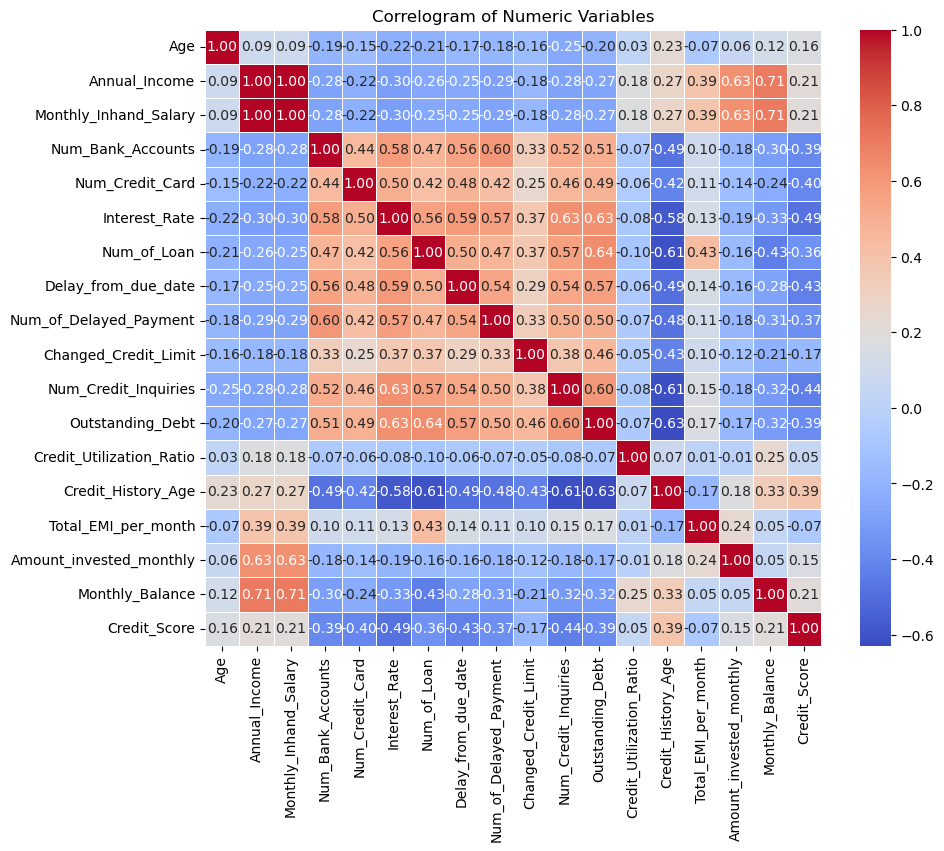

In [41]:
corr_matrix = data[num_vars].corr()

# Create the correlogram (correlation heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, square=True, linewidths=0.5)

# Set the title
plt.title('Correlogram of Numeric Variables')

# Display the plot
#plt.tight_layout()
plt.show()

In [38]:
# Your target variable: Credit Score (0, 1, 2)
target = 'Credit_Score'

pred_vars = cont_vars + ['Occupation_Accountant', 'Occupation_Architect', 'Occupation_Developer',
                         'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Entrepreneur', 
                         'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager', 
                         'Occupation_Mechanic', 'Occupation_Media_Manager', 'Occupation_Musician',
                         'Occupation_Scientist', 'Occupation_Teacher', 'Occupation_Writer']

# Separate features and target variable
X = data[pred_vars]
y = data[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
# One-hot encode the target variable (Credit Score categories)
y_train_encoded = to_categorical(y_train, num_classes=3)
y_test_encoded = to_categorical(y_test, num_classes=3)

In [44]:
model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))  # Output layer with 3 units (one for each category)

In [46]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [52]:
# Train the model
history = model.fit(X_train_scaled, y_train_encoded, epochs=20, batch_size=32, validation_data=(X_test_scaled, y_test_encoded))

Epoch 1/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7014 - loss: 0.6798 - val_accuracy: 0.6944 - val_loss: 0.6980
Epoch 2/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.7035 - loss: 0.6775 - val_accuracy: 0.6945 - val_loss: 0.6965
Epoch 3/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.7019 - loss: 0.6750 - val_accuracy: 0.6948 - val_loss: 0.6959
Epoch 4/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6997 - loss: 0.6791 - val_accuracy: 0.6907 - val_loss: 0.7038
Epoch 5/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7004 - loss: 0.6770 - val_accuracy: 0.6983 - val_loss: 0.6932
Epoch 6/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7023 - loss: 0.6753 - val_accuracy: 0.6949 - val_loss: 0.6967
Epoch 7/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 0.6987 - loss: 0.6821 - val_accuracy: 0.6957 - val_loss: 0.6967
Epoch 8/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.7004 - loss: 0

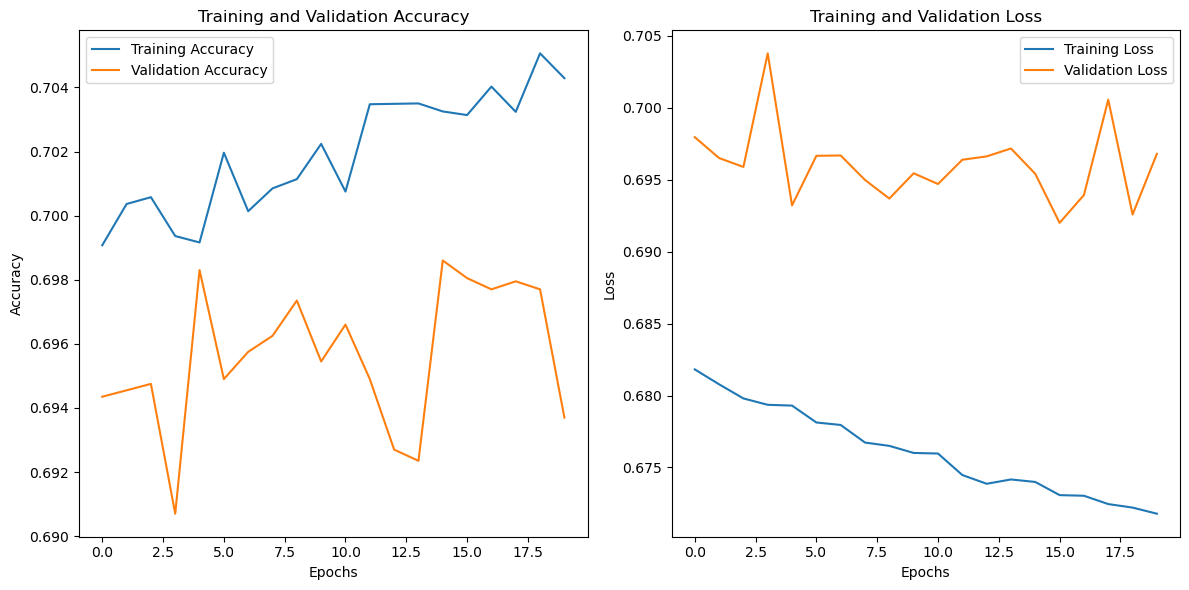

In [54]:
# Plotting accuracy and validation accuracy
plt.figure(figsize=(12, 6))

# Plot training accuracy
plt.subplot(1, 2, 1)  # (rows, columns, position)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training loss and validation loss
plt.subplot(1, 2, 2)  # (rows, columns, position)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [67]:
# Predict the categories for the test set
y_pred_prob = model.predict(X_test_scaled)

# Convert probabilities to predicted classes
y_pred_class = np.argmax(y_pred_prob, axis=1)

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [69]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_class)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.6856


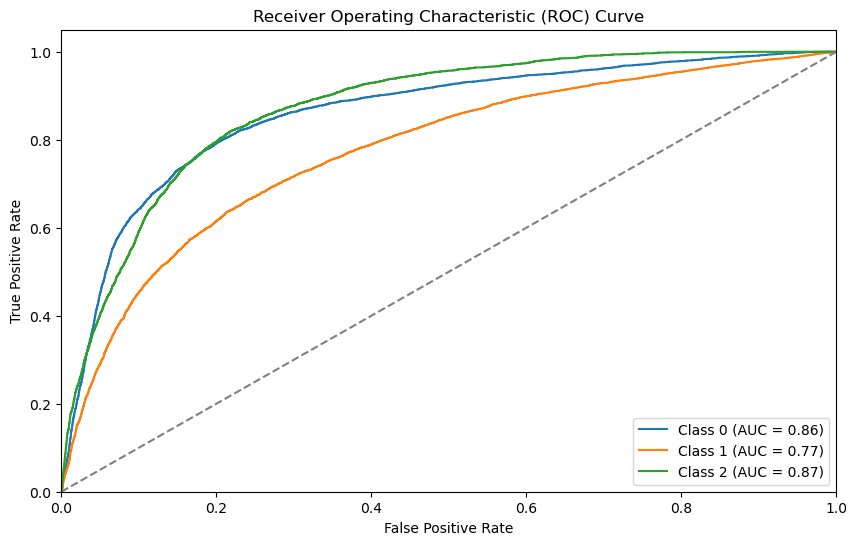

In [71]:
# ROC Curve (one vs. rest for multiclass classification)
fpr = {}
tpr = {}
roc_auc = {}

for i in range(3):  # Three categories (0, 1, 2)
    fpr[i], tpr[i], _ = roc_curve(y_test_encoded[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(10, 6))
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [130]:
#### MODELO 2 ####
## Agregamos una capa mas
# Create a neural network model
model = Sequential()
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))  # Dropout layer with 30% dropout rate
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))  # Dropout layer with 30% dropout rate
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))  # Dropout layer with 30% dropout rate
model.add(Dense(3, activation='softmax'))

'''
model.add(Dense(512, activation='relu', kernel_regularizer=l1(0.001))) 
model.add(Dense(256, activation='relu', kernel_regularizer=l1(0.001))) 
model.add(Dense(128, activation='relu', kernel_regularizer=l1(0.001)))
model.add(Dense(64, activation='relu', kernel_regularizer=l1(0.001)))
model.add(Dense(32, activation='relu', kernel_regularizer=l1(0.001)))
model.add(Dense(3, activation='softmax'))  # Output layer with 3 units (one for each category)
'''

"\nmodel.add(Dense(512, activation='relu', kernel_regularizer=l1(0.001))) \nmodel.add(Dense(256, activation='relu', kernel_regularizer=l1(0.001))) \nmodel.add(Dense(128, activation='relu', kernel_regularizer=l1(0.001)))\nmodel.add(Dense(64, activation='relu', kernel_regularizer=l1(0.001)))\nmodel.add(Dense(32, activation='relu', kernel_regularizer=l1(0.001)))\nmodel.add(Dense(3, activation='softmax'))  # Output layer with 3 units (one for each category)\n"

In [132]:
optimizer = Adam(learning_rate=0.0001) 
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [134]:
# Train the model
history_complex = model.fit(X_train_scaled, y_train_encoded, epochs=500, batch_size=128, validation_data=(X_test_scaled, y_test_encoded))

Epoch 1/500
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5278 - loss: 0.9550 - val_accuracy: 0.6406 - val_loss: 0.7971
Epoch 2/500
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6126 - loss: 0.8283 - val_accuracy: 0.6515 - val_loss: 0.7735
Epoch 3/500
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6354 - loss: 0.7998 - val_accuracy: 0.6571 - val_loss: 0.7605
Epoch 4/500
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6370 - loss: 0.7912 - val_accuracy: 0.6624 - val_loss: 0.7549
Epoch 5/500
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6435 - loss: 0.7838 - val_accuracy: 0.6677 - val_loss: 0.7459
Epoch 6/500
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6496 - loss: 0.7713 - val_accuracy: 0.6714 - val_loss: 0.7416
Epoch 7/500
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6552 - loss: 0.7636 - val_accuracy: 0.6750 - val_loss: 0.7357
Epoch 8/500
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6597 - loss: 0.7571 - val_accu

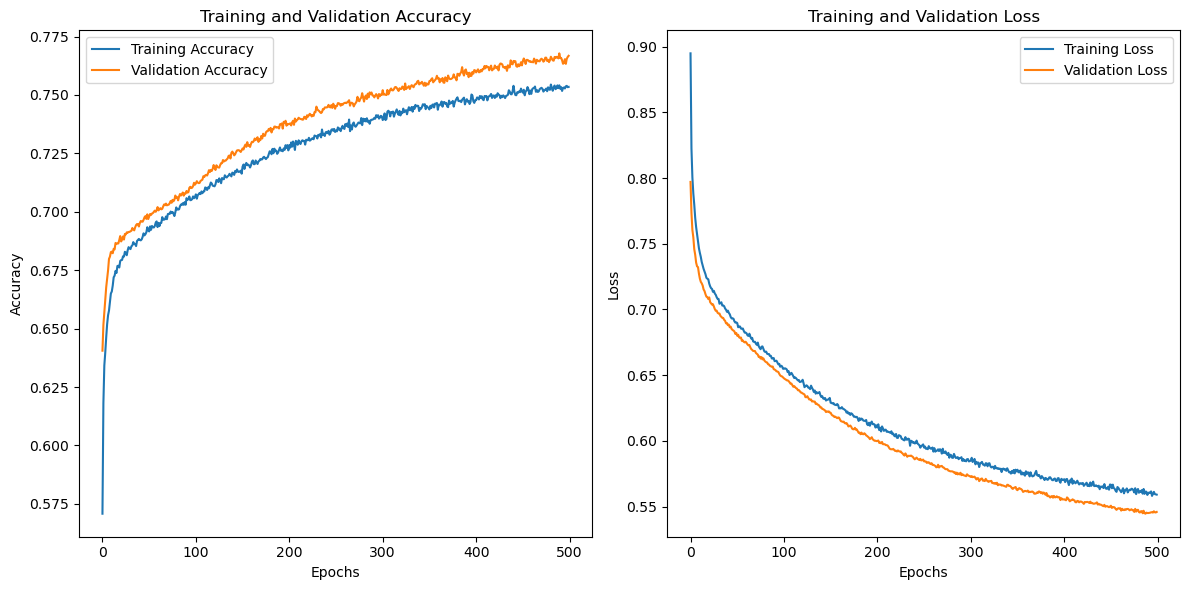

In [136]:
# Plotting accuracy and validation accuracy
plt.figure(figsize=(12, 6))

# Plot training accuracy
plt.subplot(1, 2, 1)  # (rows, columns, position)
plt.plot(history_complex.history['accuracy'], label='Training Accuracy')
plt.plot(history_complex.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training loss and validation loss
plt.subplot(1, 2, 2)  # (rows, columns, position)
plt.plot(history_complex.history['loss'], label='Training Loss')
plt.plot(history_complex.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout() 
plt.show()

In [138]:
# Predict the categories for the test set
y_pred_prob = model.predict(X_test_scaled)

# Convert probabilities to predicted classes
y_pred_class = np.argmax(y_pred_prob, axis=1)

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [140]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_class)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.7668


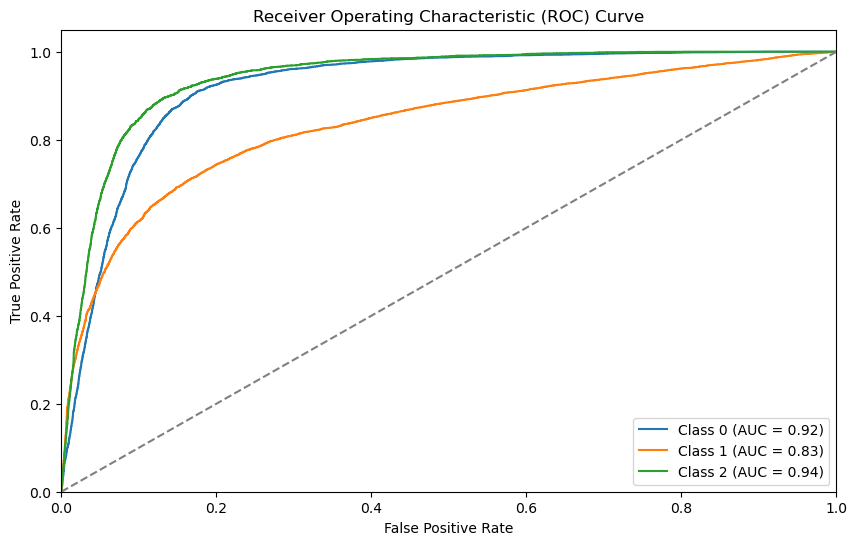

In [142]:
# ROC Curve (one vs. rest for multiclass classification)
fpr = {}
tpr = {}
roc_auc = {}

for i in range(3):  # Three categories (0, 1, 2)
    fpr[i], tpr[i], _ = roc_curve(y_test_encoded[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(10, 6))
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()